# Movie Recommendation System: Machine Learning in R

A **Recommendation System** is capable of learning watch patterns and providing relevant suggestions for content that could appeal to users. A recommendation system also finds the similarity between different products. The recommendation system is evident in our daily lives. For example, Netflix Recommendation System provides recommendations of movies that are similar to the ones that have been watched in the past.

## 1. Overview of the Movie Recommendation System Project

The main goal of this machine learning project is to build a recommendation engine that recommends movies to users. We will be developing an **Item Based Collaborative Filter**. The recommendation system will provide suggestions to users through a filtering process that is based on user preferences and browsing history. The information about the user is taken as an input in the form of browsing data. This information reflects the prior usage of the product as well as the assigned ratings.

<img src="recommendation diagram.png">

There are two types of recommendation systems – **Content-Based Recommendation System** and **Collaborative Content Filtering Recommendation**. In this project, we will work on a collaborative filtering recommendation system and more specifically, ITEM based collaborative recommendation system that provides recommendations with respect to other users who might have a similar viewing history or preferences.

The biggest benefit of the Collaborative Filtering approach and especially the item-based one is that it analyzes the interaction between users and items, thus, while recommending items, it can search for patterns in the grouping of items. Thus, this method does not involve comprehending the content of the items, and therefore, it can be applied to any type of products and services. Also, it is capable of analyzing big data, and users get their recommendations in real-time.

## 2. Importing the Dataset and Essential Libraries

In order to build our recommendation system, we will use the `MovieLens` dataset. The `movies.csv` and `ratings.csv` files used in this project can be found [here]( https://drive.google.com/file/d/1Dn1BZD3YxgBQJSIjbfNnmCFlDW2jdQGD/view). This data consists of 105339 ratings applied over 10329 movies.

We will also make use of these four R packages – `recommenderlab`, `ggplot2`, `data.table` and `reshape2`.

In [1]:
# Importing Essential Libraries
library(tidyverse)
library(recommenderlab)
library(data.table)
library(reshape2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loading required package: arules


Attaching package: 'arules'


The following object is masked from 'package:dplyr':

    recode


The following objects are masked from 'package:base':

    abbreviate, write


Loading required package: proxy


Attaching package: 'proxy'


The following object is masked from 'package:Matrix':


In [2]:
# Importing the Datasets

movie_data <- read.csv("datasets/movies.csv")
rating_data <- read.csv("datasets/ratings.csv")

glimpse(movie_data)
glimpse(rating_data)

Rows: 10,329
Columns: 3
$ movieId <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…
$ title   <chr> "Toy Story (1995)", "Jumanji (1995)", "Grumpier Old Men (1995)…
$ genres  <chr> "Adventure|Animation|Children|Comedy|Fantasy", "Adventure|Chil…
Rows: 105,339
Columns: 4
$ userId    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ movieId   <int> 16, 24, 32, 47, 50, 110, 150, 161, 165, 204, 223, 256, 260, …
$ rating    <dbl> 4.0, 1.5, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 0.5, 4.0, 0.5, …
$ timestamp <int> 1217897793, 1217895807, 1217896246, 1217896556, 1217896523, …


## 3. Data Pre-processing and Wrangling

From the above table, we observe that the `userId` column, as well as the `movieId` column, consist of integers. Furthermore, we need to convert the genres present in the `movie_data` dataframe into a more usable format by the users. In order to do so, we will first create a one-hot encoding to create a matrix that comprises of corresponding genres for each of the films.

In [3]:
rating_data

userId,movieId,rating,timestamp
<int>,<int>,<dbl>,<int>
1,16,4.0,1217897793
1,24,1.5,1217895807
1,32,4.0,1217896246
1,47,4.0,1217896556
1,50,4.0,1217896523
1,110,4.0,1217896150
1,150,3.0,1217895940
1,161,4.0,1217897864
1,165,3.0,1217897135


In [4]:
movie_data %>% 
separate_longer_delim(genres, delim = "|") %>%
mutate(value = 1) %>%
spread(key = genres, value = value, fill = 0) %>%
mutate_if(is.double, as.integer)

head(movie_data)

movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,⋯,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Toy Story (1995),0,0,1,1,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,Heat (1995),0,1,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,1,0,0,0,0
8,Tom and Huck (1995),0,0,1,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,Sudden Death (1995),0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,movieId,title,genres
,<int>,<chr>,<chr>
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,5,Father of the Bride Part II (1995),Comedy
6,6,Heat (1995),Action|Crime|Thriller


There are movies that have several genres, for example, Toy Story, which is an animated film that also falls under the genres of Adventure, Children, Comedy and Fantasy. 

For our movie recommendation system to make sense of our ratings through `recommenderlabs`, we have to convert our matrix into a sparse matrix one. This new matrix is of the `class` ‘realRatingMatrix’.

In [5]:
ratingMatrix <- dcast(rating_data, userId~movieId, value.var = "rating", na.rm=FALSE)
ratingMatrix <- as.matrix(ratingMatrix[,-1]) #remove userIds

#Convert rating matrix into a recommenderlab sparse matrix
ratingMatrix <- as(ratingMatrix, "realRatingMatrix")

ratingMatrix

668 x 10325 rating matrix of class 'realRatingMatrix' with 105339 ratings.

The `getRatings` function returns the non-missing ratings values from the matrix as a numeric vector. The following histogram shows the distribution of all movie ratings in the dataset. We can see that ratings typically skew higher, centered around a median rating of 4.

In [6]:
summary(getRatings(ratingMatrix))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.500   3.000   3.500   3.517   4.000   5.000 

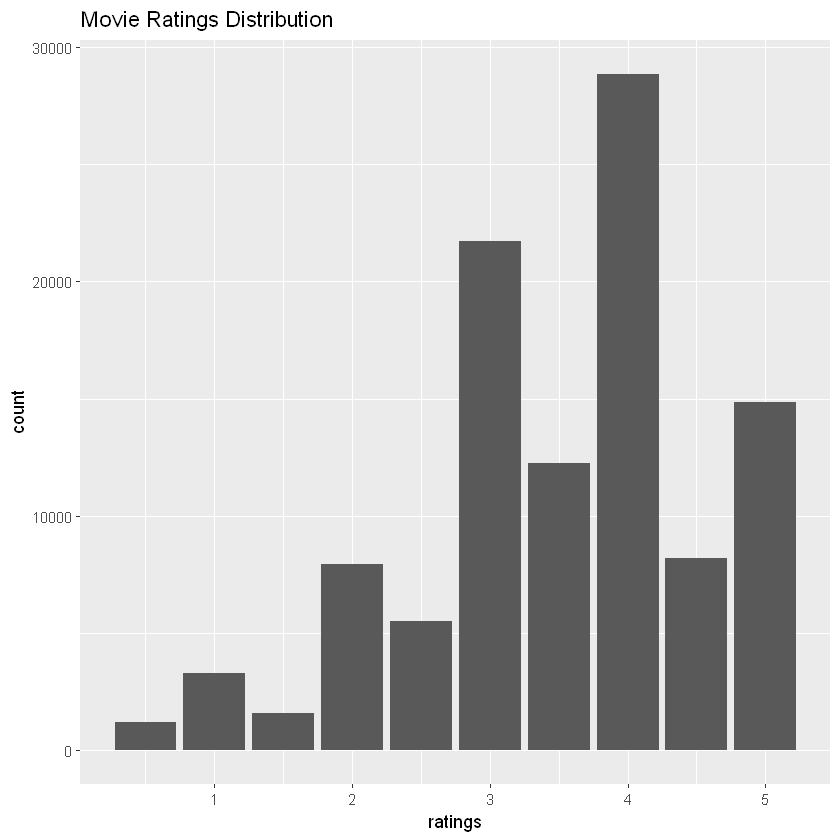

In [7]:
data.frame(ratings = getRatings(ratingMatrix)) %>%
    ggplot(aes(x = ratings)) +
    geom_bar() +
    labs(title = "Movie Ratings Distribution")

## 4. Exploring Item-based Collaborative Filtering

The recommender algorithms are stored in a registry object called `recommenderRegistry`. There are different models based on the different matrix types. Since our matrix is a real ratings matrix, we'll call the algorithms available for working on numeric ratings based review data as stored in the `realRatingMatrix`.

In [8]:
recommendation_model <- recommenderRegistry$get_entries(dataType = "realRatingMatrix")
names(recommendation_model)

[1] "HYBRID_realRatingMatrix"       "ALS_realRatingMatrix"         
 [3] "ALS_implicit_realRatingMatrix" "IBCF_realRatingMatrix"        
 [5] "LIBMF_realRatingMatrix"        "POPULAR_realRatingMatrix"     
 [7] "RANDOM_realRatingMatrix"       "RERECOMMEND_realRatingMatrix" 
 [9] "SVD_realRatingMatrix"          "SVDF_realRatingMatrix"        
[11] "UBCF_realRatingMatrix"

In [9]:
# Descriptions of the models
lapply(recommendation_model, "[[", "description")

$HYBRID_realRatingMatrix
[1] "Hybrid recommender that aggegates several recommendation strategies using weighted averages."

$ALS_realRatingMatrix
[1] "Recommender for explicit ratings based on latent factors, calculated by alternating least squares algorithm."

$ALS_implicit_realRatingMatrix
[1] "Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm."

$IBCF_realRatingMatrix
[1] "Recommender based on item-based collaborative filtering."

$LIBMF_realRatingMatrix
[1] "Matrix factorization with LIBMF via package recosystem (https://cran.r-project.org/web/packages/recosystem/vignettes/introduction.html)."

$POPULAR_realRatingMatrix
[1] "Recommender based on item popularity."

$RANDOM_realRatingMatrix
[1] "Produce random recommendations (real ratings)."

$RERECOMMEND_realRatingMatrix
[1] "Re-recommends highly rated items (real ratings)."

$SVD_realRatingMatrix
[1] "Recommender based on SVD approximation with column-mean imputation."

$SVDF_realRatingMatrix
[1] "Recommender based on Funk SVD with gradient descend (https://sifter.org/~simon/journal/20061211.html)."

$UBCF_realRatingMatrix
[1] "Recommender based on user-based collaborative filtering."

We will implement the **Item Based Collaborative Filtering** model in this R project.

In [10]:
recommendation_model$IBCF_realRatingMatrix

Recommender method: IBCF for realRatingMatrix Description: Recommender
  based on item-based collaborative filtering. Reference: NA
Parameters:
   k   method normalize normalize_sim_matrix alpha na_as_zero
1 30 "cosine"  "center"                FALSE   0.5      FALSE

There are 4 parameters to account for with this model as described above:

- **method**: this is the type of similarity metric to calculate similarity between users real ratings profile. Cosine similarity, Pearson correlation coefficient, and Jaccard similarity are available options. The first two are not good options if using unary ratings, but work well for this scenario.

- **k**: this parameter sets the neighborhood of most similar users to consider for each user profile. the ratings profiles of the k nearest neighbors will be the basis for making predictions on a users unrated items profile.

- **sample**: a logical value to indicate whether the data should be sampled for train/test. Probably best to explicitely set a reproducible seed and sample the data before running the model.

- **normalize**: how to normalize real ratings provided by different users. This is crucially important b/c all users have a different bias in how they tend to rate items. This can be done by passing a value to this parameter inside the algorithm or applied to the matrix before any modeling too. See `?normalize` for additional details.


**Relationship of Similarity between Users**

Collaborative Filtering involves suggesting movies to the users that are based on collecting preferences from many other users. For example, if a user A likes to watch action films and so does user B, then the movies that the user B will watch in the future will be recommended to A and vice-versa. Therefore, recommending movies is dependent on creating a relationship of similarity between the two users. With the help of `recommenderlab`, we can compute similarities using various operators like `cosine`, `pearson` as well as `jaccard`.

Using [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity), we can figure out how similar each user is to each other. i) for each user, identify the k most similar users. Here, `k` parameter was the 30 most similar users who rated common items most similarly.

,1,2,3,4
1,NA,0.9880430,0.9820862,0.9957199
2,0.9880430,NA,0.9962866,0.9687126
3,0.9820862,0.9962866,NA,0.9944484
4,0.9957199,0.9687126,0.9944484,NA


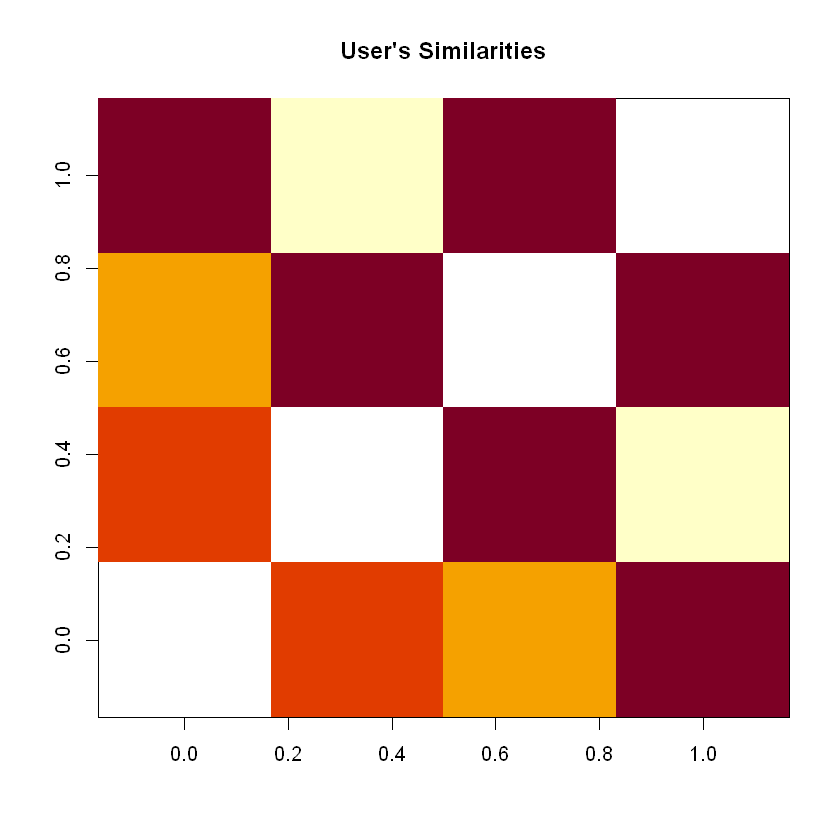

In [11]:
similarity_mat <- similarity(ratingMatrix[1:4],
                             method = "cosine",
                             which = "users")
as.matrix(similarity_mat)

image(as.matrix(similarity_mat), main = "User's Similarities")

In the above matrix, each row and column represents a user. We have taken four users and each cell in this matrix represents the similarity that is shared between the two users.

Now, we delineate the similarity that is shared between the films.